In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm

# C:\Windows\Fonts   # ==> OS에 등록되어 있는 모든 폰트 파일들
font_path = 'C:\\Windows\\Fonts\\H2GTRM.TTF' # 윈도우 OS 폰트 경로

font_prop = fm.FontProperties(fname = font_path) # 폰트경로에 있는 폰트 이름들 뽑아오자.


font_name = font_prop.get_name() # 폰트명

#matplotlib.rc('font', key=value)
matplotlib.rc('font', family=font_name)

# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False) # matplotlib의 기본적인 유니코드 minus폰트사용 중지

In [5]:
train = pd.read_csv('../data/train.csv')
train.head(3)

,item_id,year,month,seq,type,hs4,weight,quantity,value
0,DEWLVASR,2022,1,1.0,1,3038,14858.0,0.0,32688.0
1,ELQGMQWE,2022,1,1.0,1,2002,62195.0,0.0,110617.0
2,AHMDUILJ,2022,1,1.0,1,2102,18426.0,0.0,72766.0


In [6]:
# 각 열의 고유값 개수
display(train.apply(lambda x: len(np.unique(x)), axis=0))

# 각 열의 고유값 목록
display(train.apply(lambda x: np.unique(x), axis=0))


item_id      100
year           4
month         12
seq            3
type           1
hs4           71
weight      7438
quantity    1226
value       9686
dtype: int64

item_id     [AANGBULD, AHMDUILJ, ANWUJOKX, APQGTRMF, ATLDM...
year                                 [2022, 2023, 2024, 2025]
month                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
seq                                           [1.0, 2.0, 3.0]
type                                                      [1]
hs4         [1210, 2002, 2102, 2501, 2529, 2612, 2701, 271...
weight      [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
quantity    [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
value       [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...
dtype: object

In [7]:
# pivot table: item_id × month → 총 무역량
pivot = train.pivot_table(
    index='item_id',
    columns='month',
    values='value',
    aggfunc='sum',
    fill_value=0
)
display(pivot.head())


month,1,2,3,4,5,6,7,8,9,10,11,12
item_id,,,,,,,,,,,,
AANGBULD,66612.0,145742.0,92593.0,353766.0,53521.0,744177.0,667253.0,506469.0,313076.0,456613.0,144547.0,68392.0
AHMDUILJ,621515.0,432203.0,605674.0,465735.0,327894.0,555698.0,367213.0,487565.0,530652.0,353700.0,411116.0,294674.0
ANWUJOKX,27980.0,0.0,0.0,63580.0,81670.0,26424.0,8470.0,28731.0,0.0,80475.0,0.0,32979.0
APQGTRMF,779279.0,997028.0,543639.0,1087719.0,1083203.0,1188941.0,1440510.0,545487.0,918163.0,1018541.0,630985.0,826455.0
ATLDMDBO,355882710.0,234896124.0,247203736.0,230100939.0,226964089.0,179639568.0,280963874.0,163002448.0,129058600.0,200139698.0,152949137.0,179085930.0


In [8]:
train.groupby('item_id')['value'].describe()


,count,mean,std,min,25%,50%,75%,max
item_id,,,,,,,,
AANGBULD,56.0,6.451359e+04,1.124716e+05,0.0,0.00,25985.5,52647.50,533478.0
AHMDUILJ,129.0,4.227627e+04,3.651950e+04,3531.0,9612.00,26080.0,68096.00,153608.0
ANWUJOKX,18.0,1.946161e+04,2.156006e+04,0.0,0.00,17447.0,28620.00,63580.0
APQGTRMF,115.0,9.617348e+04,1.218377e+05,0.0,0.00,13037.0,173708.50,502659.0
ATLDMDBO,125.0,2.063909e+07,1.746949e+07,128.0,8836150.00,16627788.0,24199054.00,111041383.0
...,...,...,...,...,...,...,...,...
YSYHGLQK,98.0,9.779388e+02,1.844923e+03,0.0,0.00,362.0,851.00,10651.0
ZCELVYQU,105.0,8.133365e+04,1.978949e+05,0.0,22.00,3458.0,45792.00,1187539.0
ZGJXVMNI,129.0,7.520910e+05,3.676362e+05,4572.0,498655.00,645665.0,948859.00,2069252.0


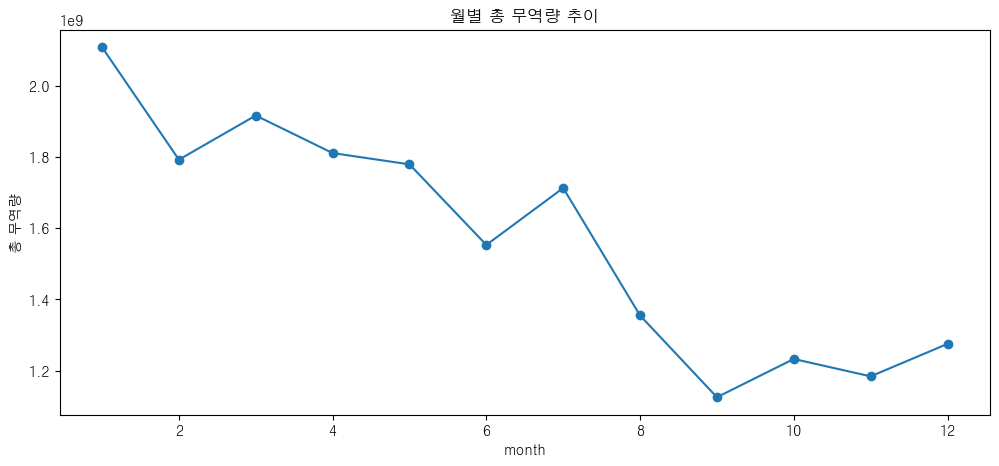

In [ ]:
monthly_sum = train.groupby('month')['value'].sum()
monthly_sum.plot(kind='line', marker='o', figsize=(12,5), title='월별 총 무역량 추이')
plt.ylabel('총 무역량')
plt.show()


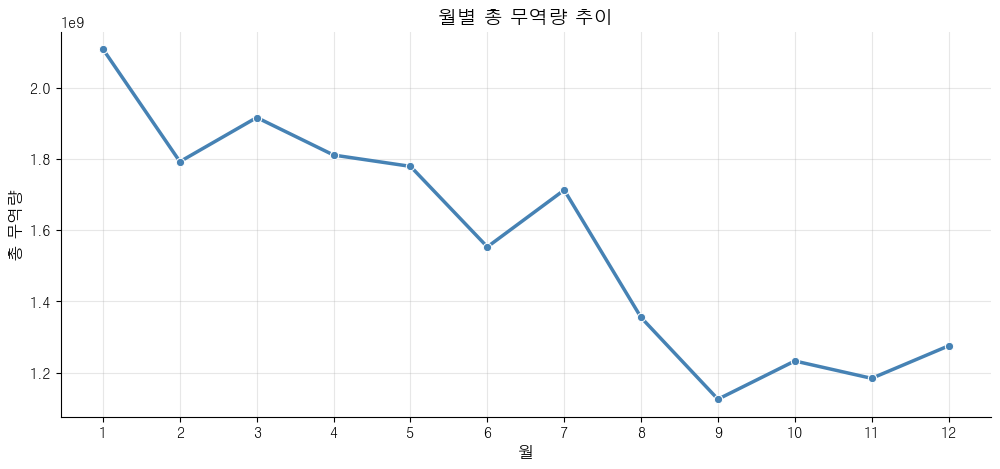

In [15]:

# ① 월별 총 무역량 집계
monthly_sum = (
    train.groupby('month')['value']
    .sum()
    .reset_index()
    .sort_values('month')
)

# ② seaborn lineplot
plt.figure(figsize=(12,5))
sns.lineplot(
    data=monthly_sum,
    x='month',
    y='value',
    marker='o',
    linewidth=2.5,
    color='steelblue'
)

plt.title('월별 총 무역량 추이', fontsize=14)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 무역량', fontsize=12)
plt.xticks(range(1, 13))  # 1~12월 표시
plt.grid(True, alpha=0.3)
sns.despine()  # 윗줄/오른쪽 테두리 제거
plt.show()

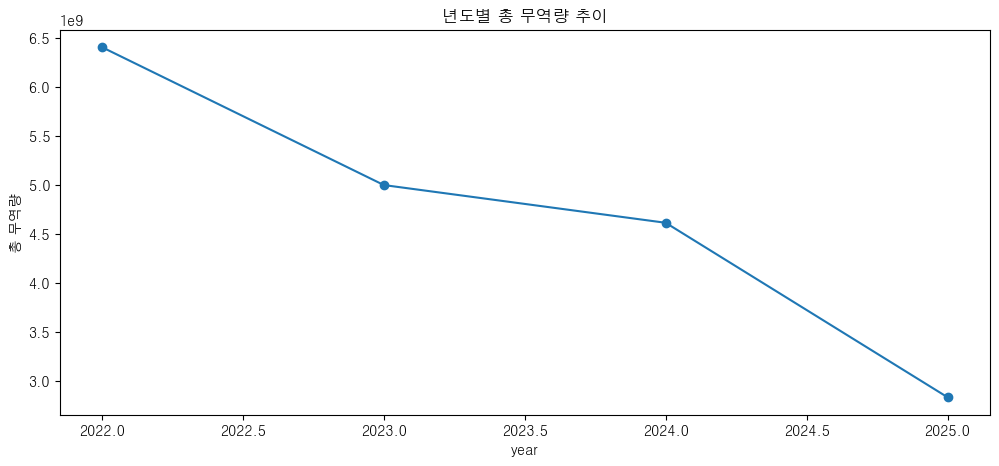

In [12]:
yearly_sum = train.groupby('year')['value'].sum()
yearly_sum.plot(kind='line', marker='o', figsize=(12,5), title='년도별 총 무역량 추이')
plt.ylabel('총 무역량')
plt.show()

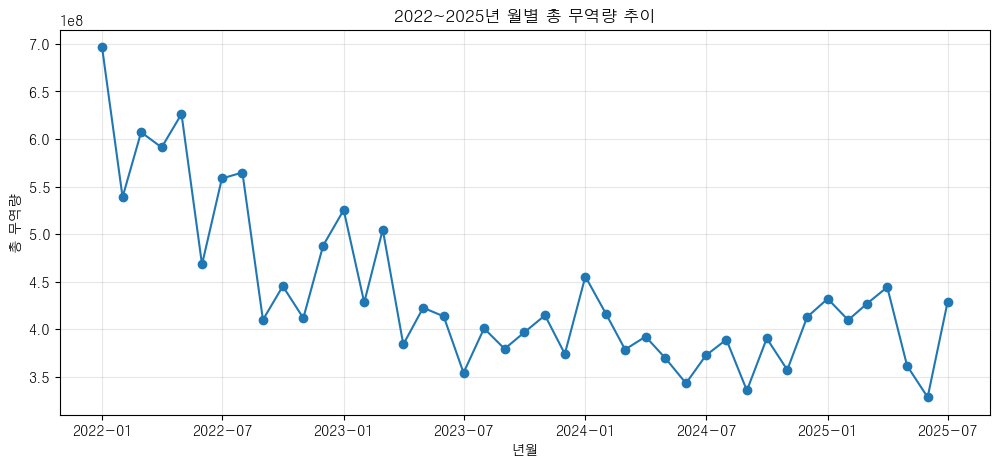

In [14]:
# datetime 변환
monthly_sum['ym'] = pd.to_datetime(
    monthly_sum['year'].astype(str) + '-' + monthly_sum['month'].astype(str) + '-01'
)

# 전체 기간 추이
plt.figure(figsize=(12,5))
plt.plot(monthly_sum['ym'], monthly_sum['value'], marker='o')
plt.title('2022~2025년 월별 총 무역량 추이')
plt.xlabel('년월')
plt.ylabel('총 무역량')
plt.grid(True, alpha=0.3)
plt.show()


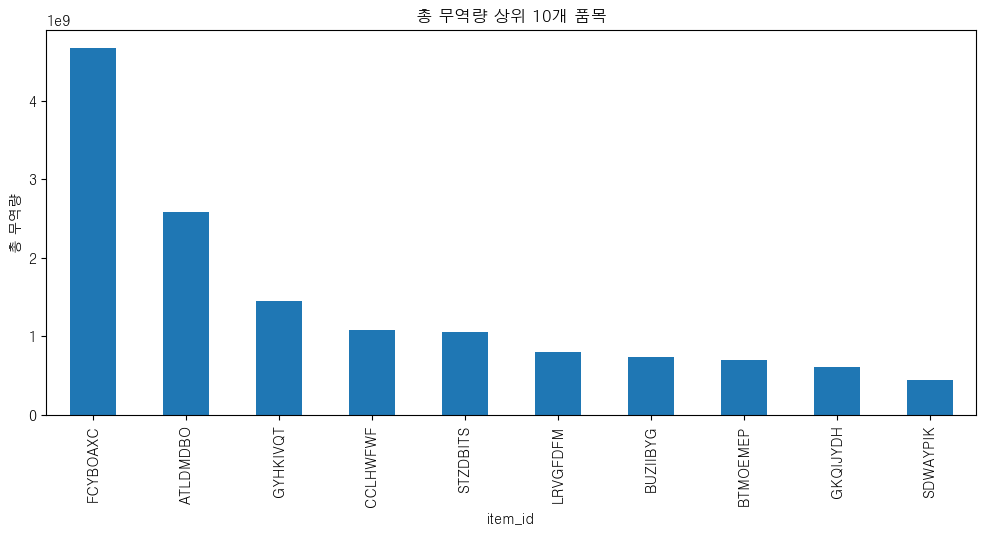

In [10]:
top_items = train.groupby('item_id')['value'].sum().sort_values(ascending=False).head(10)
top_items.plot(kind='bar', figsize=(12,5), title='총 무역량 상위 10개 품목')
plt.ylabel('총 무역량')
plt.show()


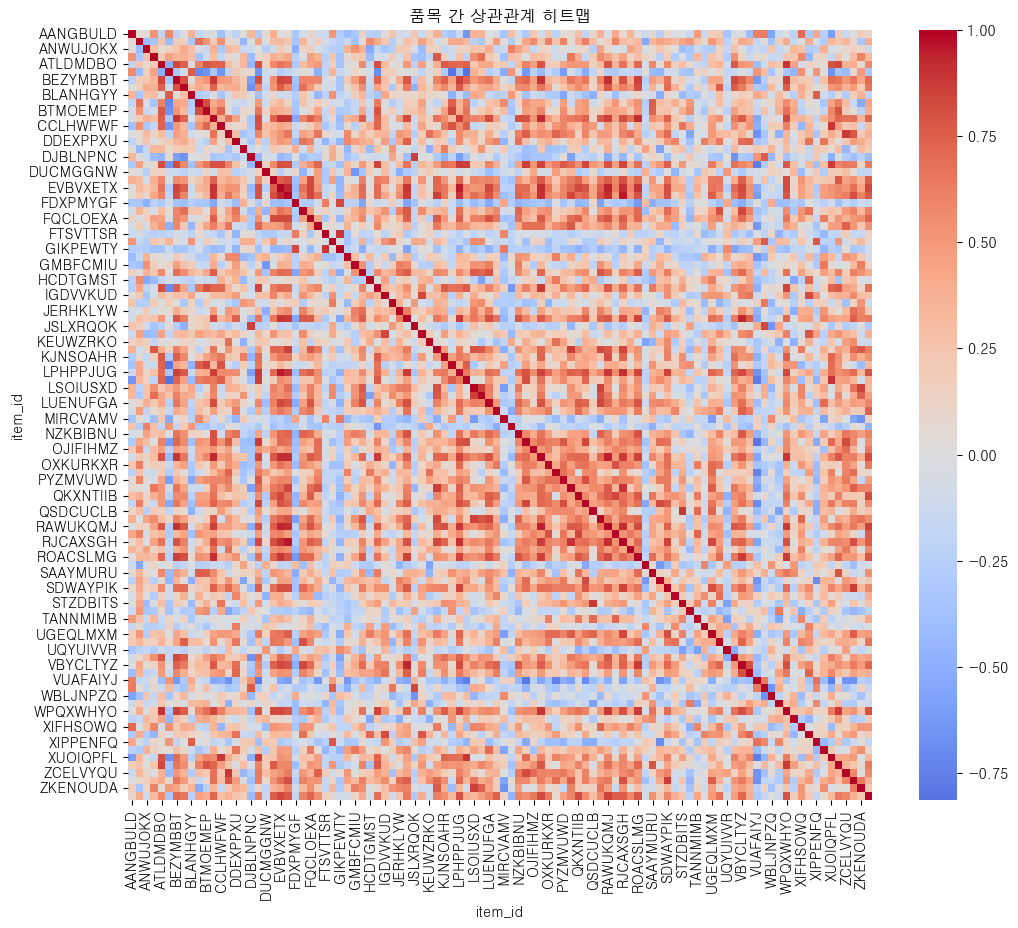

In [ ]:


corr_matrix = pivot.T.corr()  # item_id 간 상관계수
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('품목 간 상관관계 히트맵')
plt.show()
